<a href="https://colab.research.google.com/github/sathar1919/DashBoard/blob/main/Inducting_Regression_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Jupyter magic command (only works in Jupyter Notebooks or Colab).
#It tells Jupyter to display plots inline, meaning the plots will be shown directly below the code cell
#that produces them.
#Without this, matplotlib plots might open in a separate window or not show at all
# (depending on your environment).

import warnings
warnings.filterwarnings("ignore")
#disables warnings.
#import warnings: Brings in Python’s built-in warnings module.
#warnings.filterwarnings("ignore"): Suppresses all warning messages from being displayed.

In [4]:
house_data = pd.read_csv("/content/kchousedata.csv")


In [5]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house_data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [9]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
features = house_data.columns.drop({"id", "date", "zipcode", "lat", "long", "price"})
target = ["price"]
print(features)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


In [11]:
# We are not encoding class, which is the target variable in the get_dummies method().
house_data_encoded = pd.get_dummies(house_data[features])
house_data_encoded["price"] = house_data["price"]
house_data_encoded.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
house_train,house_test = train_test_split(house_data_encoded,test_size=0.15,random_state=100)
house_train.shape, house_test.shape

((18371, 16), (3242, 16))

In [13]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model

DecisionTreeRegressor(max_depth=5)

In [14]:
features = house_train.columns.drop("price")
target = ["price"]
model=model.fit(house_train[features],house_train[target])

In [15]:
from sklearn.tree import export_graphviz

In [16]:
import os
os.environ["PATH"] += os.pathsep+"C:\\Program Files (x86)\\Graphviz2.38\\bin"

In [19]:
pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.8 MB/s eta 0:00:00


In [25]:
from sklearn.tree import export_graphviz
import graphviz

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dot_data = export_graphviz(model, out_file=None,
                           feature_names=features,
                           #class_names=model.classes_,
                           filled=True, rounded=True,
                           impurity=False)

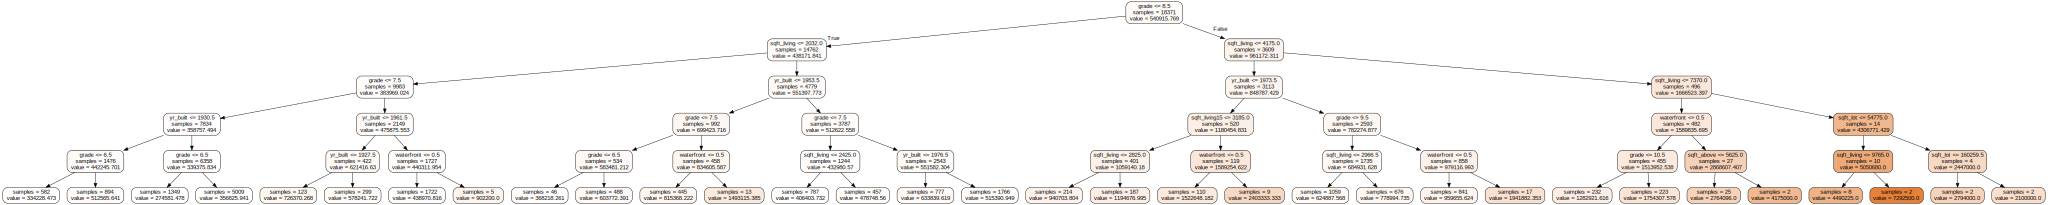

In [29]:
graph = graphviz.Source(dot_data)
graph
# A large tree is plotted.
# You can effectiviely visualize a smaller one by reducing features
# or reducing the complexity of the tree (will be explained later)

In [30]:
# Inducting a decision tree to predict the price using predict
model.predict([[0,0,1,1,0,1,0,0,0,1,0,0,1,1,0]])

array([334228.47250859])

In [33]:
g_arr = np.array(house_train["grade"]<8.5 )
sl_arr = np.array(house_train["sqft_living"] < 2039)
res = g_arr & sl_arr
print(res)

[False False False ... False  True  True]


In [37]:
fin = house_train["price"] > 1000  # Example condition
p_arr = np.array(house_train["price"])
p_mean = np.mean(p_arr[fin])
print(p_mean)

540915.7691470252


In [38]:
# SST = sum((actual value - average value)^2)
sst = np.sum((p_arr - p_mean)**2)
print(sst)
# Obtained value = 2944977309788046.5

2492552993017224.0


In [39]:
# Splitting the train_data on sqft_living value of 3268
# Left split SL1: sqft_living<3268
sl_arr = np.array(house_train["sqft_living"] < 3268)
p_arr = np.array(house_train["price"])
p_mean = np.mean(p_arr[sl_arr])
ssl1 = np.sum((sl_arr - p_mean)**2)
# Right Split SR1: sqft_living >= 3268
sl_arr = np.array(house_train["sqft_living"] >= 3268)
p_arr = np.array(house_train["price"])
p_mean = np.mean(p_arr[sl_arr])
ssr1 = np.sum((sl_arr - p_mean)**2)
# Values of SSL1 and SSR1 obtained are
print(ssl1) # SSL1 = 4.122385750583733e+15
print(ssr1) # SSR1 = 2.46084264998362e+16


4122385750583733.0
2.46084264998362e+16


In [40]:
# Splitting the train_data on grade value of 8.5
# Left split SL2: grade < 8.5
g_arr = np.array(house_train["grade"] < 8.5)
p_arr = np.array(house_train["price"])
p_mean = np.mean(p_arr[sl_arr])
ssl2 = np.sum((g_arr - p_mean)**2)
# Right Split SR2: grade >= 8.5
g_arr = np.array(house_train["grade"] >= 8.5)
p_arr = np.array(house_train["price"])
p_mean = np.mean(p_arr[sl_arr])
ssr2 = np.sum((g_arr - p_mean)**2)
# Values of SSL2 and SSR2 obtained are
print(ssl2) # SSL2 = 2.460839650984707e+16
print(ssr2) # SSR2 = 2.460842232632969e+16


2.460839650984707e+16
2.460842232632969e+16


In [41]:
# Delta Error for Split 1 (split on sqft_living)
n = house_train.shape[0]
nl1 = np.array(house_train["sqft_living"] < 3268).shape[0]
nr1 = np.array(house_train["sqft_living"] >= 3268).shape[0]
delta_error_split_1 = sst - (((nl1/n)*ssl1) + ((nr1/n)*ssr1))
print(delta_error_split_1) #delta_error_split_1 = -2.5814403002303308e+16
# Delta Error for Split 2 (split on grade)
n = house_train.shape[0]
nl2 = np.array(house_train["grade"] < 8.5).shape[0]
nr2 = np.array(house_train["grade"] >= 8.5).shape[0]
delta_error_split_2 = sst - (((nl2/n)*ssl2) + ((nr2/n)*ssr2))
print(delta_error_split_2) #delta_error_split_2 = -4.6300409588060136e+16

-2.6238259257402708e+16
-4.672426584315954e+16
